# Лабораторная работа No 3

### Регрессионная модель изменения цен на дома в Бостоне

### Цель

Реализовать предсказание медианной цены на дома в пригороде Бостона в середине 1970-
х по таким данным, как уровень преступности, ставка местного имущественного налога и т.
д.
Данный набор содержит относительно немного образцов данных: всего 506, разбитых на
404 обучающих и 102 контрольных образца. И каждый признак во входных данных
(например, уровень преступности) имеет свой масштаб. Например, некоторые признаки
являются пропорциями и имеют значения между 0 и 1, другие — между 1 и 12 и т. д.
Не путайте регрессию с алгоритмом логистической регрессии. Как ни странно,
логистическая регрессия не является регрессионным алгоритмом — это алгоритм
классификации.

### Задачи
1. Ознакомиться с задачей регрессии
2. Изучить отличие задачи регрессии от задачи классификации
3. Создать модель
4. Настроить параметры обучения
5. Обучить и оценить модель
6. Ознакомиться с перекрестной проверкой

### Выполнение работы

In [1]:
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
print(train_data.shape)
print(test_data.shape)
print(test_targets)

(404, 13)
(102, 13)
[ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2 18.6 14.5 17.8 50.
 20.8 24.3 24.2 19.8 19.1 22.7 12.  10.2 20.  18.5 20.9 23.  27.5 30.1
  9.5 22.  21.2 14.1 33.1 23.4 20.1  7.4 15.4 23.8 20.1 24.5 33.  28.4
 14.1 46.7 32.5 29.6 28.4 19.8 20.2 25.  35.4 20.3  9.7 14.5 34.9 26.6
  7.2 50.  32.4 21.6 29.8 13.1 27.5 21.2 23.1 21.9 13.  23.2  8.1  5.6
 21.7 29.6 19.6  7.  26.4 18.9 20.9 28.1 35.4 10.2 24.3 43.1 17.6 15.4
 16.2 27.1 21.4 21.5 22.4 25.  16.6 18.6 22.  42.8 35.1 21.5 36.  21.9
 24.1 50.  26.7 25. ]


404 обучающих и 102 контрольных образца, каждый с 13 числовыми признаками.
Цены в основном находятся в диапазоне от 10 000 до 50 000 долларов США.
Было бы проблематично передать в нейронную сеть значения, имеющие самые разные
диапазоны. Сеть, конечно, сможет автоматически адаптироваться к таким разнородным
данным, однако это усложнит обучение. На практике к таким данным принято применять
нормализацию: для каждого признака во входных данных (столбца в матрице входных
данных) из каждого значения вычитается среднее по этому признаку, и разность делится
на стандартное отклонение, в результате признак центрируется по нулевому значению и
имеет стандартное отклонение, равное единице. Такую нормализацию легко выполнить с
помощью Numpy.

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

def chart_create(num, min_x, max_x, min_y, max_y, label):
    dpi=80
    plt.figure(num = num, dpi = dpi, figsize = (1024 / dpi, 512 / dpi))
    mpl.rcParams.update({'font.size':10})
    plt.axis([min_x, max_x, min_y, max_y])
    
    plt.title(label + 'Chart')
    plt.xlabel('Epoch')
    plt.ylabel(label)
    
def chart_printline(num, x_values, y_values, label):
    plt.figure(num = num)
    
    color = (np.random.random(), np.random.random(), np.random.random())
    plt.plot(x_values, y_values, color = color, linestyle = 'solid', label = label)
    plt.legend(loc = 'upper left')

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
2.4255958795547485


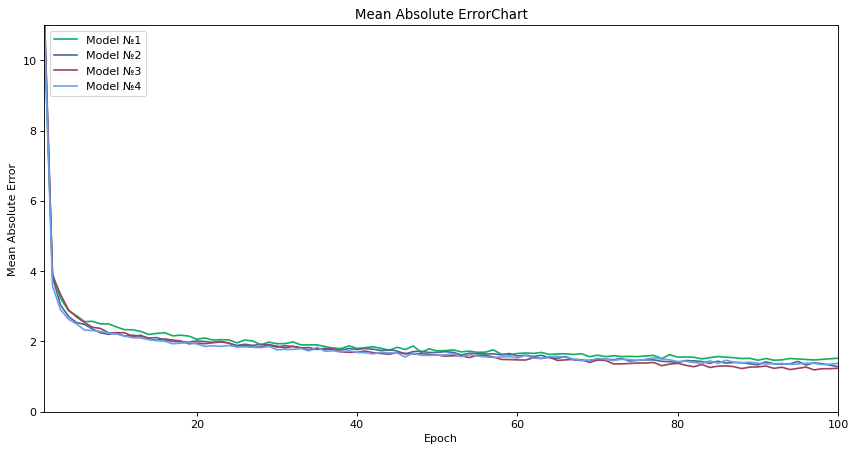

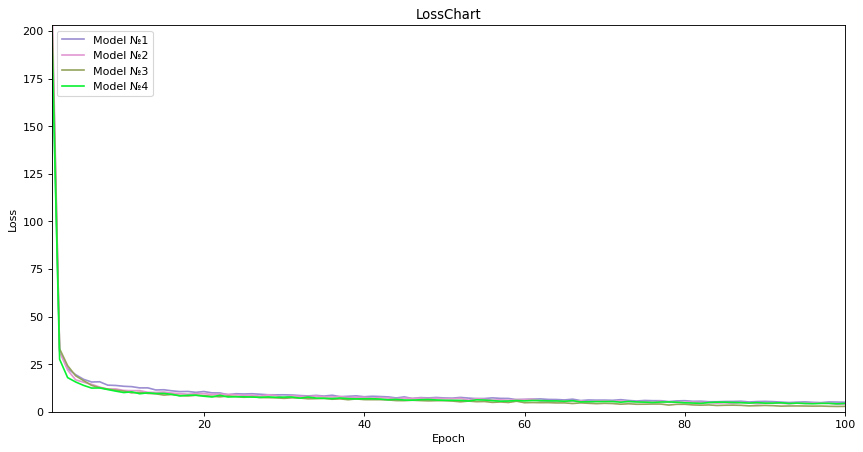

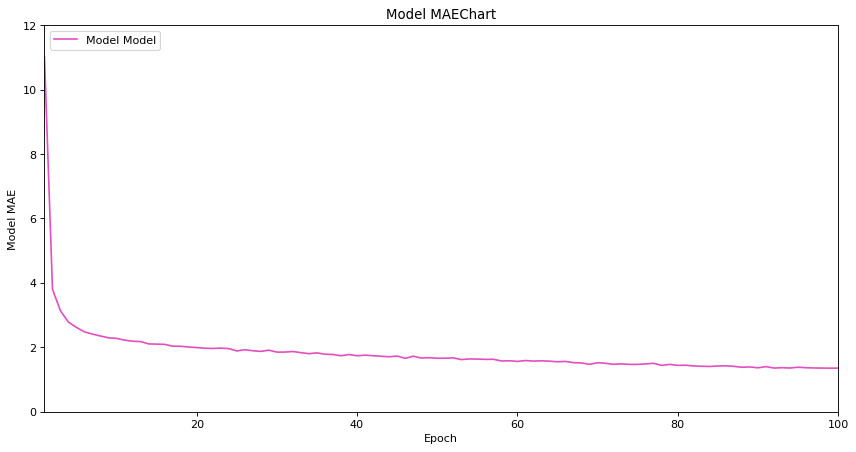

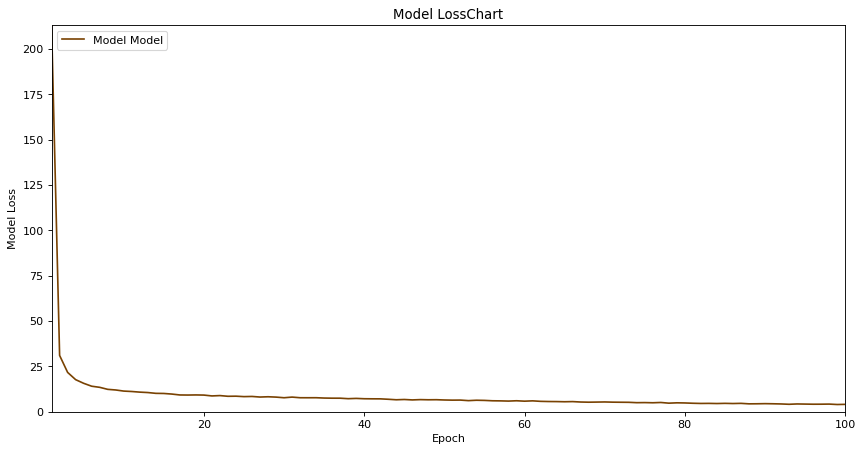

In [3]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

x_values = range(1, num_epochs + 1)

y_values_array1 = []
y_values_array2 = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    
    model = build_model()
    hist = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    
    y_values1 = hist.history['mae']
    y_values2 = hist.history['loss']
    
    chart_create(1, 1, num_epochs, 0, math.ceil(max(y_values1)), 'Mean Absolute Error')
    chart_create(2, 1, num_epochs, 0, math.ceil(max(y_values2)), 'Loss')
    
    chart_printline(1, x_values, y_values1, 'Model №' + str(i+1))
    chart_printline(2, x_values, y_values2, 'Model №' + str(i+1))
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    
    y_values_array1.append(y_values1)
    y_values_array2.append(y_values2)
    
print(np.mean(all_scores))

y_values_mean1 = []
y_values_mean2 = []

for i in range(len(y_values_array1[0])):
    mean_row = []
    for j in range(len(y_values_array1)):
        mean_row.append(y_values_array1[j][i])
    y_values_mean1.append(np.mean(mean_row))
    
for i in range(len(y_values_array2[0])):
    mean_row = []
    for j in range(len(y_values_array2)):
        mean_row.append(y_values_array2[j][i])
    y_values_mean2.append(np.mean(mean_row))  

chart_create(3, 1, num_epochs, 0, math.ceil(max(y_values_mean1)), 'Model MAE')
chart_create(4, 1, num_epochs, 0, math.ceil(max(y_values_mean2)), 'Model Loss')

chart_printline(3, x_values, y_values_mean1, 'Model Model')
chart_printline(4, x_values, y_values_mean2, 'Model Model')

### Требования

1. Объяснить различия задач классификации и регрессии
2. Изучить влияние кол-ва эпох на результат обучения модели
3. Выявить точку переобучения
4. Применить перекрестную проверку по K блокам при различных K
5. Построить графики ошибки и точности во время обучения для моделей, а также
усредненные графики по всем моделям

### Вопрос №1



Регрессия - это алгоритм, который можно обучить для прогнозирования действительного числа. Классификация - это алгоритм , который обучается определять категории для новых значений.

### Вопрос №2


Количество эпох равное 80

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
2.5447975397109985


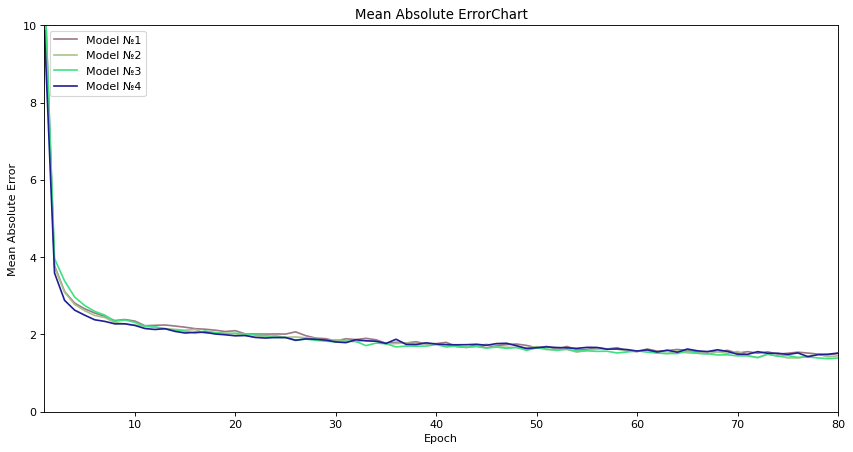

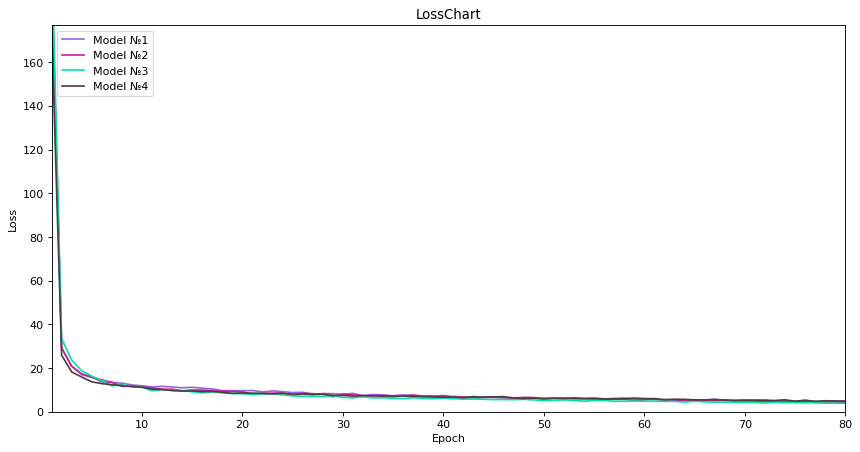

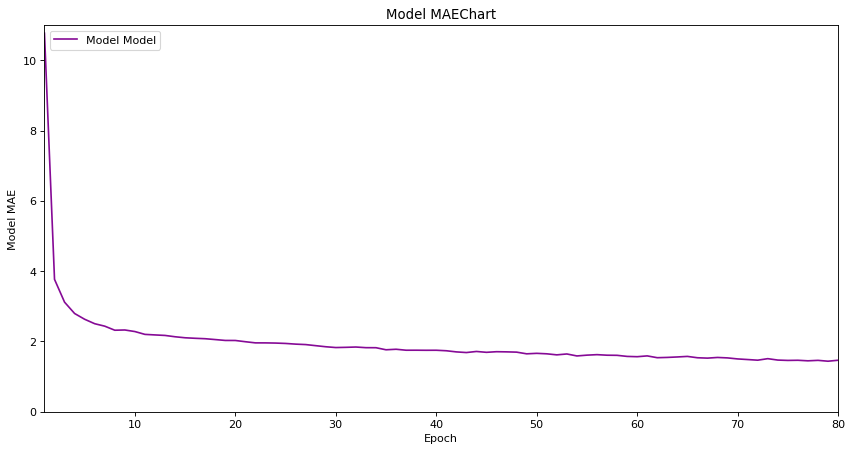

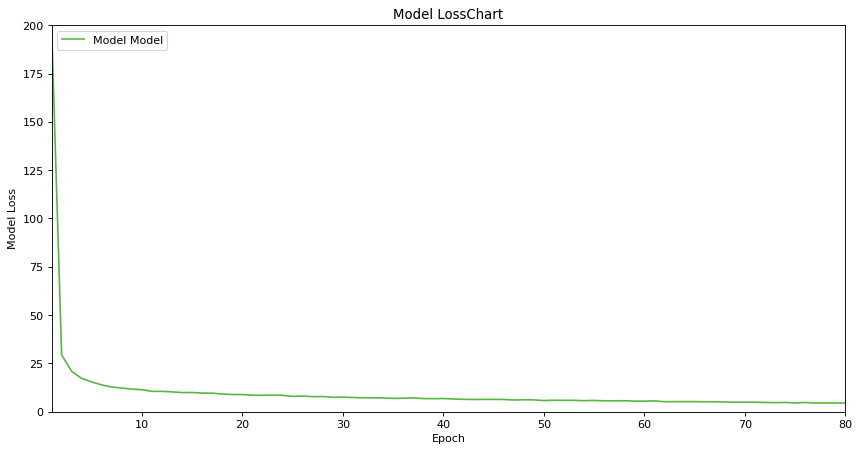

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

k = 4
num_val_samples = len(train_data) // k
num_epochs = 80
all_scores = []

x_values = range(1, num_epochs + 1)

y_values_array1 = []
y_values_array2 = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    
    model = build_model()
    hist = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    
    y_values1 = hist.history['mae']
    y_values2 = hist.history['loss']
    
    chart_create(1, 1, num_epochs, 0, math.ceil(max(y_values1)), 'Mean Absolute Error')
    chart_create(2, 1, num_epochs, 0, math.ceil(max(y_values2)), 'Loss')
    
    chart_printline(1, x_values, y_values1, 'Model №' + str(i+1))
    chart_printline(2, x_values, y_values2, 'Model №' + str(i+1))
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    
    y_values_array1.append(y_values1)
    y_values_array2.append(y_values2)
    
print(np.mean(all_scores))

y_values_mean1 = []
y_values_mean2 = []

for i in range(len(y_values_array1[0])):
    mean_row = []
    for j in range(len(y_values_array1)):
        mean_row.append(y_values_array1[j][i])
    y_values_mean1.append(np.mean(mean_row))
    
for i in range(len(y_values_array2[0])):
    mean_row = []
    for j in range(len(y_values_array2)):
        mean_row.append(y_values_array2[j][i])
    y_values_mean2.append(np.mean(mean_row))  

chart_create(3, 1, num_epochs, 0, math.ceil(max(y_values_mean1)), 'Model MAE')
chart_create(4, 1, num_epochs, 0, math.ceil(max(y_values_mean2)), 'Model Loss')

chart_printline(3, x_values, y_values_mean1, 'Model Model')
chart_printline(4, x_values, y_values_mean2, 'Model Model')

Количество эпох равное 150

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
2.678720235824585


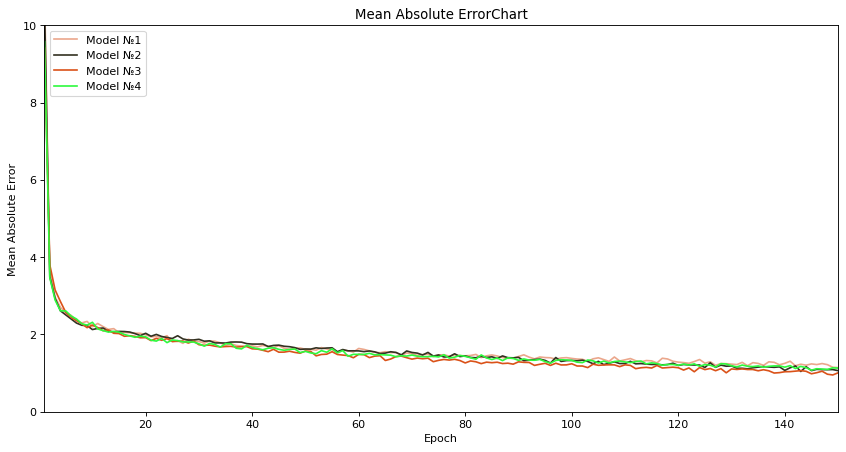

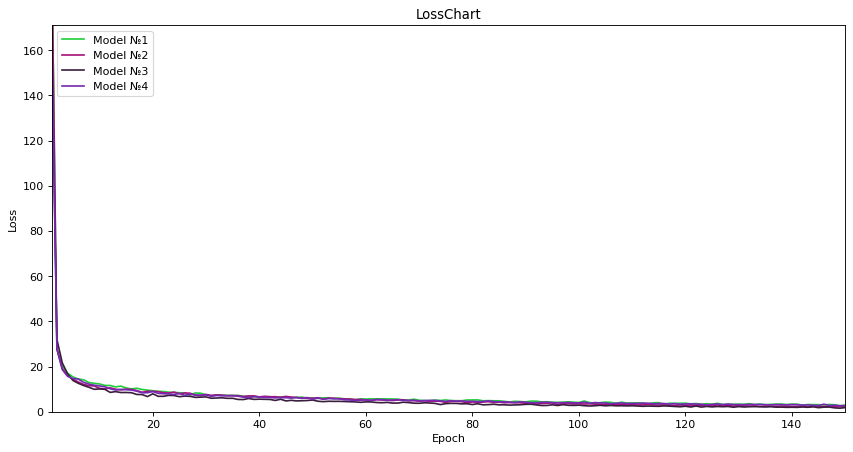

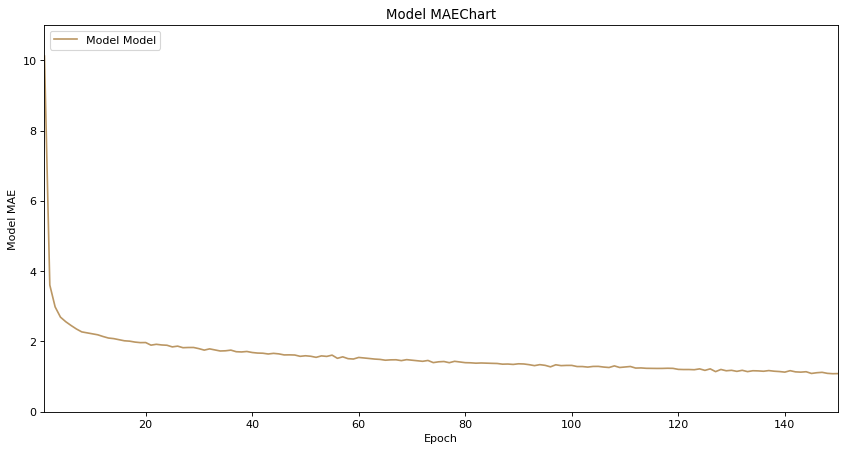

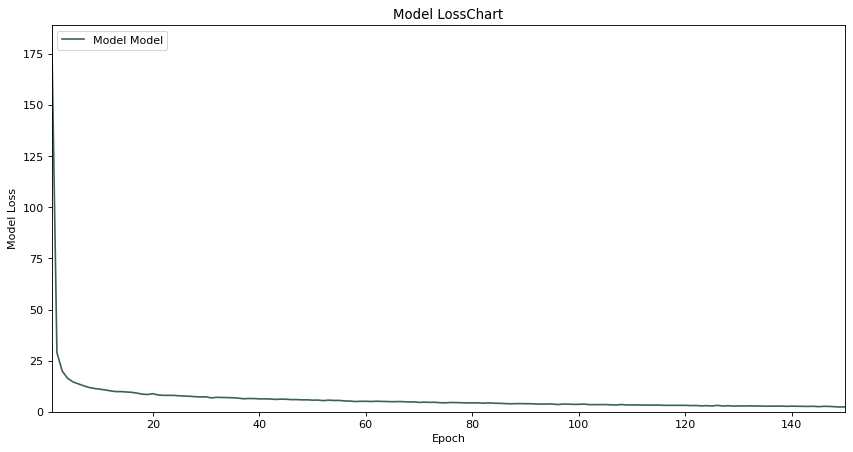

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

k = 4
num_val_samples = len(train_data) // k
num_epochs = 150
all_scores = []

x_values = range(1, num_epochs + 1)

y_values_array1 = []
y_values_array2 = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    
    model = build_model()
    hist = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    
    y_values1 = hist.history['mae']
    y_values2 = hist.history['loss']
    
    chart_create(1, 1, num_epochs, 0, math.ceil(max(y_values1)), 'Mean Absolute Error')
    chart_create(2, 1, num_epochs, 0, math.ceil(max(y_values2)), 'Loss')
    
    chart_printline(1, x_values, y_values1, 'Model №' + str(i+1))
    chart_printline(2, x_values, y_values2, 'Model №' + str(i+1))
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    
    y_values_array1.append(y_values1)
    y_values_array2.append(y_values2)
    
print(np.mean(all_scores))

y_values_mean1 = []
y_values_mean2 = []

for i in range(len(y_values_array1[0])):
    mean_row = []
    for j in range(len(y_values_array1)):
        mean_row.append(y_values_array1[j][i])
    y_values_mean1.append(np.mean(mean_row))
    
for i in range(len(y_values_array2[0])):
    mean_row = []
    for j in range(len(y_values_array2)):
        mean_row.append(y_values_array2[j][i])
    y_values_mean2.append(np.mean(mean_row))  

chart_create(3, 1, num_epochs, 0, math.ceil(max(y_values_mean1)), 'Model MAE')
chart_create(4, 1, num_epochs, 0, math.ceil(max(y_values_mean2)), 'Model Loss')

chart_printline(3, x_values, y_values_mean1, 'Model Model')
chart_printline(4, x_values, y_values_mean2, 'Model Model')

Количество эпох равное 50

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
2.2535392940044403


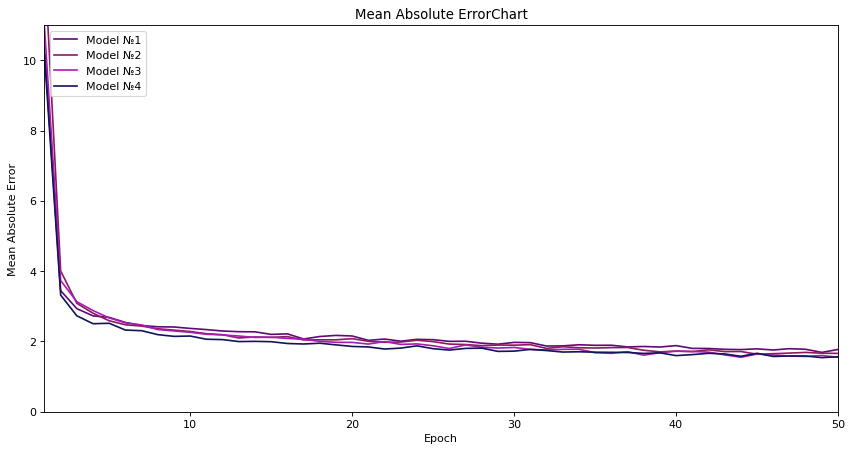

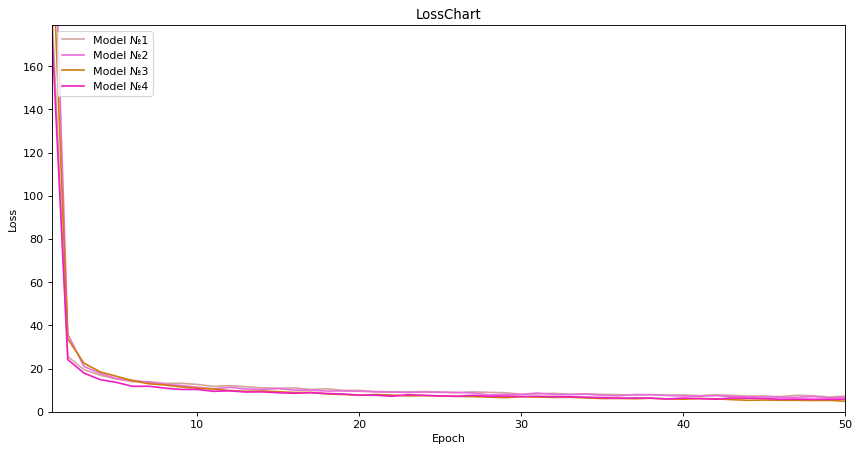

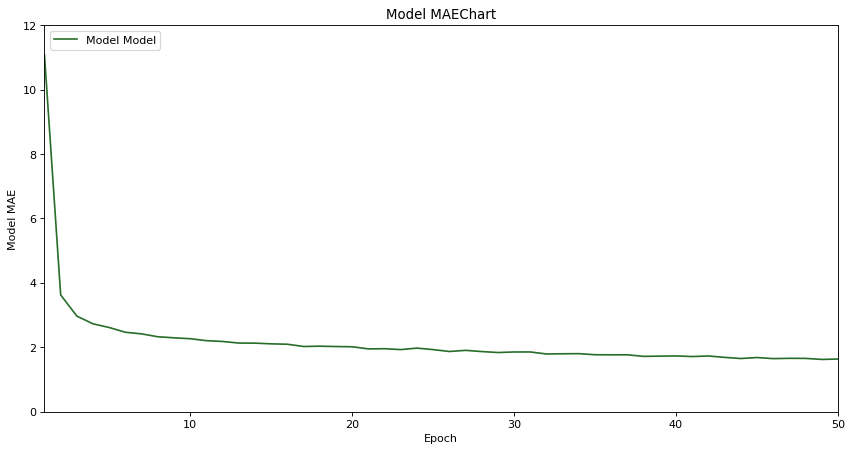

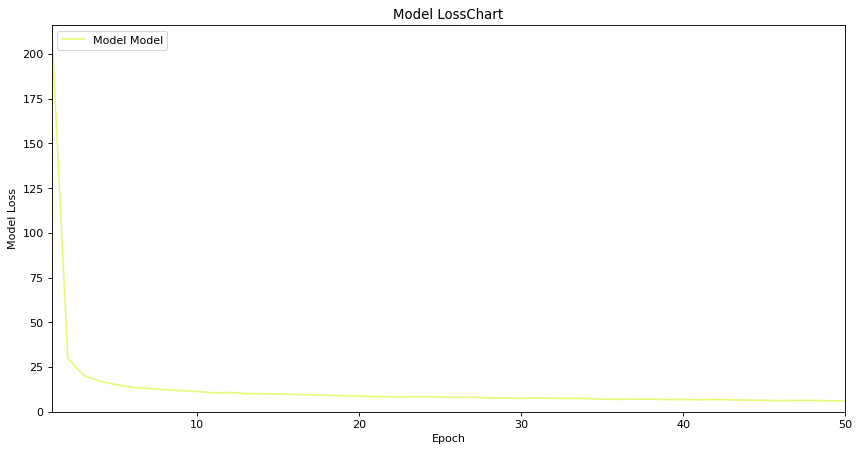

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

k = 4
num_val_samples = len(train_data) // k
num_epochs = 50
all_scores = []

x_values = range(1, num_epochs + 1)

y_values_array1 = []
y_values_array2 = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    
    model = build_model()
    hist = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    
    y_values1 = hist.history['mae']
    y_values2 = hist.history['loss']
    
    chart_create(1, 1, num_epochs, 0, math.ceil(max(y_values1)), 'Mean Absolute Error')
    chart_create(2, 1, num_epochs, 0, math.ceil(max(y_values2)), 'Loss')
    
    chart_printline(1, x_values, y_values1, 'Model №' + str(i+1))
    chart_printline(2, x_values, y_values2, 'Model №' + str(i+1))
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    
    y_values_array1.append(y_values1)
    y_values_array2.append(y_values2)
    
print(np.mean(all_scores))

y_values_mean1 = []
y_values_mean2 = []

for i in range(len(y_values_array1[0])):
    mean_row = []
    for j in range(len(y_values_array1)):
        mean_row.append(y_values_array1[j][i])
    y_values_mean1.append(np.mean(mean_row))
    
for i in range(len(y_values_array2[0])):
    mean_row = []
    for j in range(len(y_values_array2)):
        mean_row.append(y_values_array2[j][i])
    y_values_mean2.append(np.mean(mean_row))  

chart_create(3, 1, num_epochs, 0, math.ceil(max(y_values_mean1)), 'Model MAE')
chart_create(4, 1, num_epochs, 0, math.ceil(max(y_values_mean2)), 'Model Loss')

chart_printline(3, x_values, y_values_mean1, 'Model Model')
chart_printline(4, x_values, y_values_mean2, 'Model Model')

Количество эпох равное 60

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
2.3169437050819397


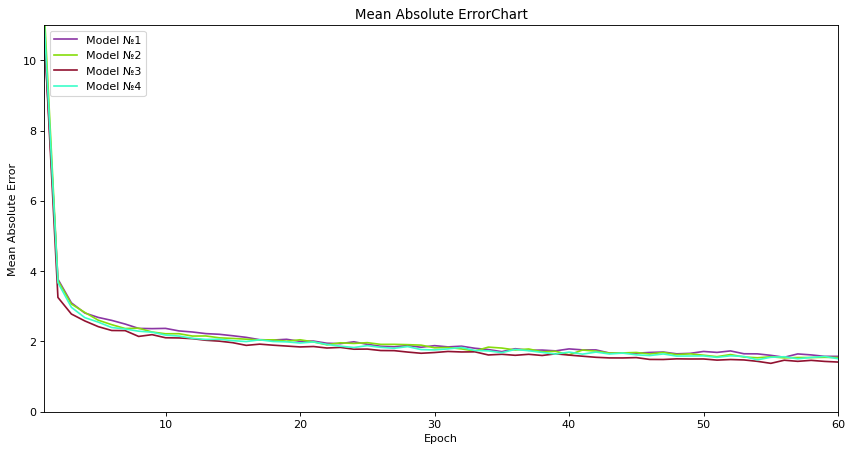

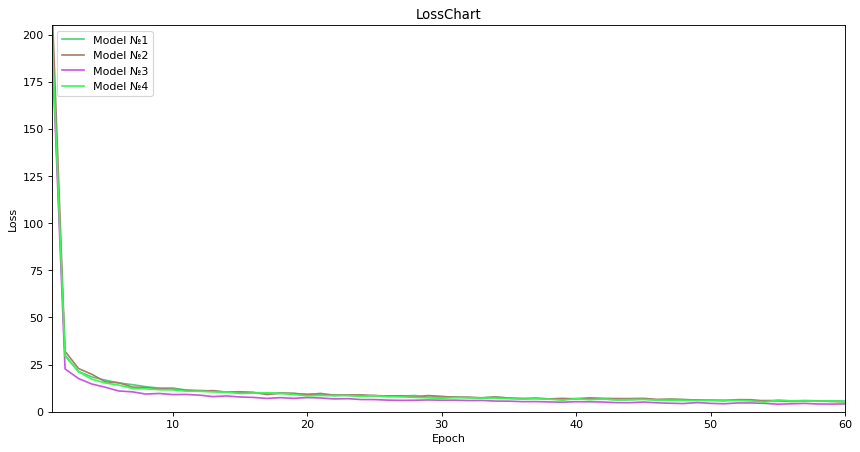

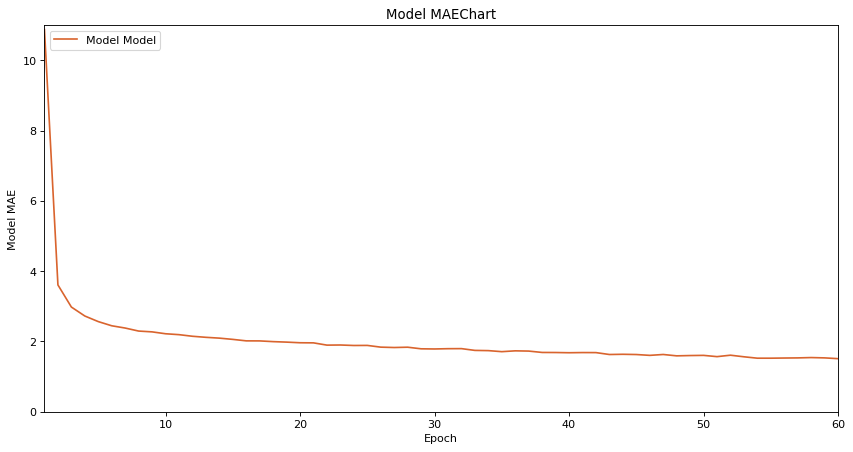

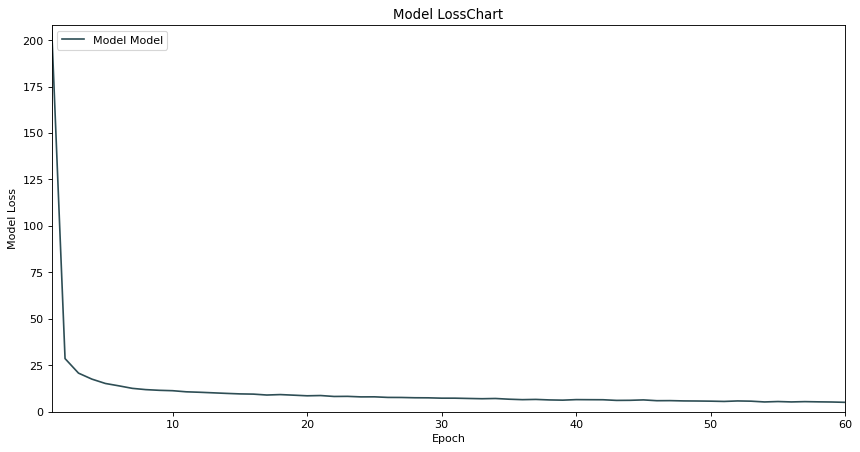

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

k = 4
num_val_samples = len(train_data) // k
num_epochs = 60
all_scores = []

x_values = range(1, num_epochs + 1)

y_values_array1 = []
y_values_array2 = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    
    model = build_model()
    hist = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    
    y_values1 = hist.history['mae']
    y_values2 = hist.history['loss']
    
    chart_create(1, 1, num_epochs, 0, math.ceil(max(y_values1)), 'Mean Absolute Error')
    chart_create(2, 1, num_epochs, 0, math.ceil(max(y_values2)), 'Loss')
    
    chart_printline(1, x_values, y_values1, 'Model №' + str(i+1))
    chart_printline(2, x_values, y_values2, 'Model №' + str(i+1))
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    
    y_values_array1.append(y_values1)
    y_values_array2.append(y_values2)
    
print(np.mean(all_scores))

y_values_mean1 = []
y_values_mean2 = []

for i in range(len(y_values_array1[0])):
    mean_row = []
    for j in range(len(y_values_array1)):
        mean_row.append(y_values_array1[j][i])
    y_values_mean1.append(np.mean(mean_row))
    
for i in range(len(y_values_array2[0])):
    mean_row = []
    for j in range(len(y_values_array2)):
        mean_row.append(y_values_array2[j][i])
    y_values_mean2.append(np.mean(mean_row))  

chart_create(3, 1, num_epochs, 0, math.ceil(max(y_values_mean1)), 'Model MAE')
chart_create(4, 1, num_epochs, 0, math.ceil(max(y_values_mean2)), 'Model Loss')

chart_printline(3, x_values, y_values_mean1, 'Model Model')
chart_printline(4, x_values, y_values_mean2, 'Model Model')

### Вопрос №3

50 - 2.2535392940044403

60 - 2.3169437050819397

80 - 2.5447975397109985

100 - 2.4255958795547485

150 - 2.678720235824585

Модель переобучается в диапазоне от 80 до 100 эпох

### Вопрос №4


K = 5

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
2.4388874769210815


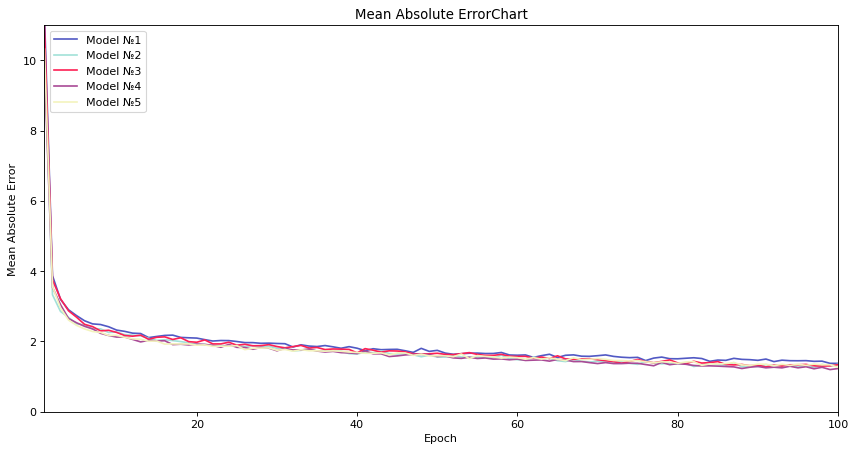

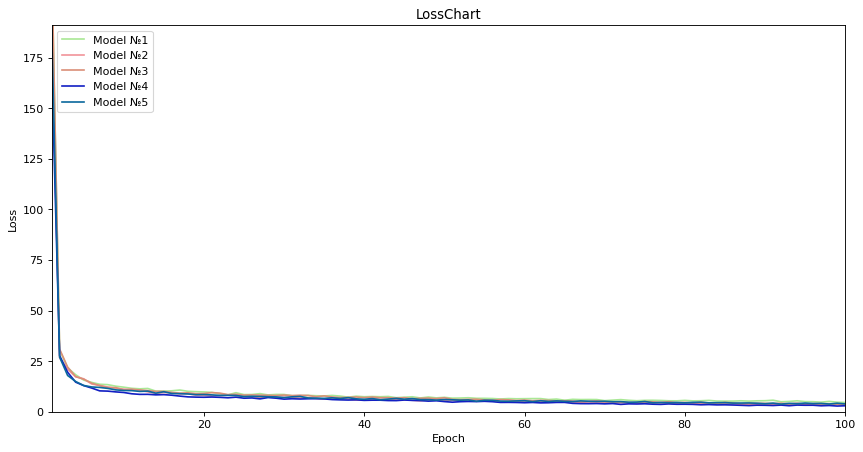

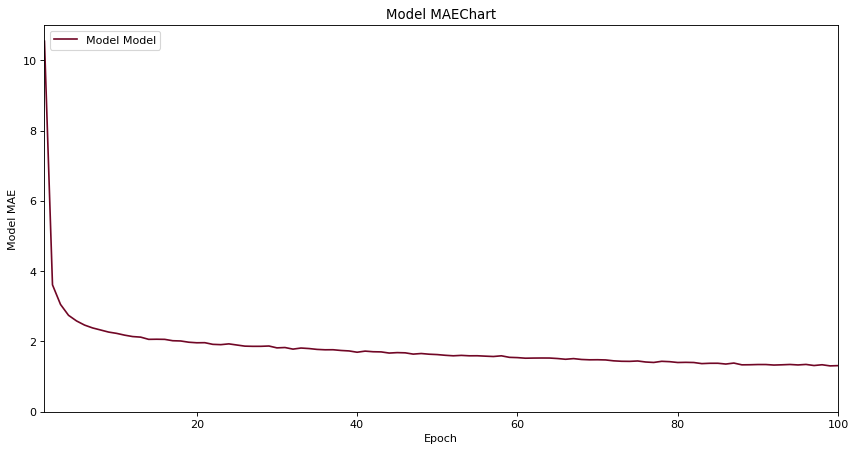

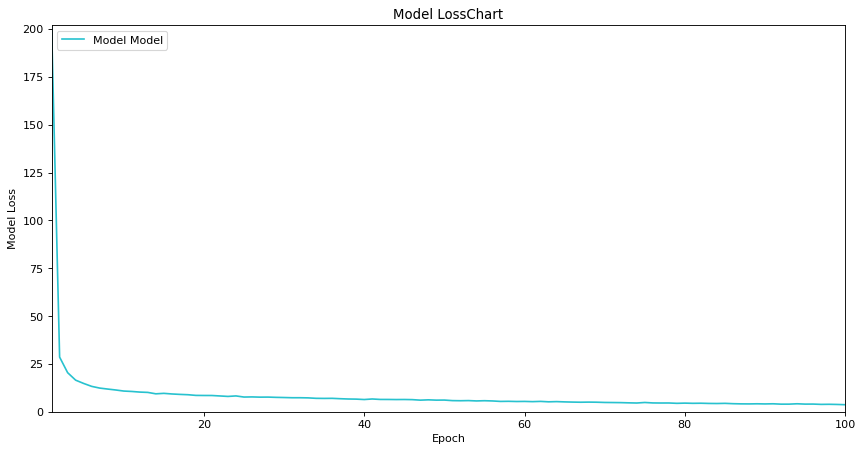

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

k = 5
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

x_values = range(1, num_epochs + 1)

y_values_array1 = []
y_values_array2 = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    
    model = build_model()
    hist = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    
    y_values1 = hist.history['mae']
    y_values2 = hist.history['loss']
    
    chart_create(1, 1, num_epochs, 0, math.ceil(max(y_values1)), 'Mean Absolute Error')
    chart_create(2, 1, num_epochs, 0, math.ceil(max(y_values2)), 'Loss')
    
    chart_printline(1, x_values, y_values1, 'Model №' + str(i+1))
    chart_printline(2, x_values, y_values2, 'Model №' + str(i+1))
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    
    y_values_array1.append(y_values1)
    y_values_array2.append(y_values2)
    
print(np.mean(all_scores))

y_values_mean1 = []
y_values_mean2 = []

for i in range(len(y_values_array1[0])):
    mean_row = []
    for j in range(len(y_values_array1)):
        mean_row.append(y_values_array1[j][i])
    y_values_mean1.append(np.mean(mean_row))
    
for i in range(len(y_values_array2[0])):
    mean_row = []
    for j in range(len(y_values_array2)):
        mean_row.append(y_values_array2[j][i])
    y_values_mean2.append(np.mean(mean_row))  

chart_create(3, 1, num_epochs, 0, math.ceil(max(y_values_mean1)), 'Model MAE')
chart_create(4, 1, num_epochs, 0, math.ceil(max(y_values_mean2)), 'Model Loss')

chart_printline(3, x_values, y_values_mean1, 'Model Model')
chart_printline(4, x_values, y_values_mean2, 'Model Model')